# IRIS FLOWER CLASSIFICATION<br/>

# The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.<br/>

# Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score


In [61]:
df = pd.read_csv("IRIS.csv")

In [62]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.shape

(150, 5)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


INTERPRETATION: Out of 5 features, 4 are numerical and only 1 i.e species is categorical type.

DATA PREPROCESSING AND VISUALIZATION

In [65]:
df.duplicated().sum() #checking for duplicates

3

INTERPRETATION: Three records found as duplicates.

In [66]:
df.drop_duplicates(inplace= True) #dropping duplicates

In [67]:
df.duplicated().sum() #rechecking duplicates

0

In [68]:
df.shape

(147, 5)

In [69]:
df.isnull().sum() #checking for missing/null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

INTERPRETATION: No null values found.

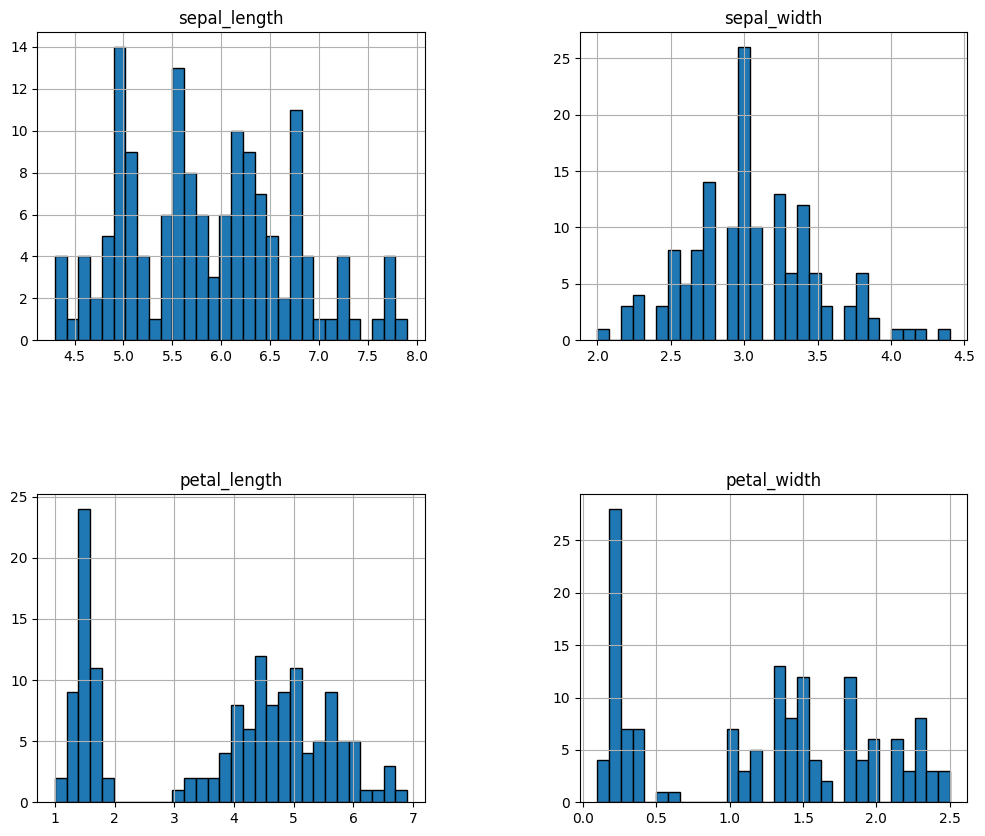

In [70]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


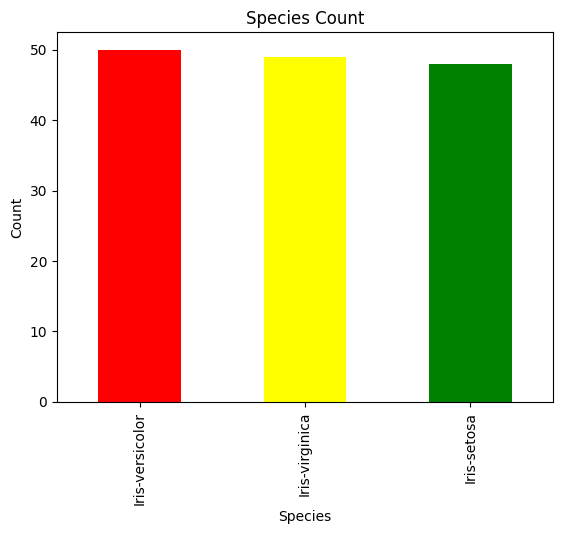

In [71]:
count = df['species'].value_counts()
print(count)
colors = ['red','yellow','green']
count.plot(kind='bar',color= colors)
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Species Count')
plt.show()

<Axes: >

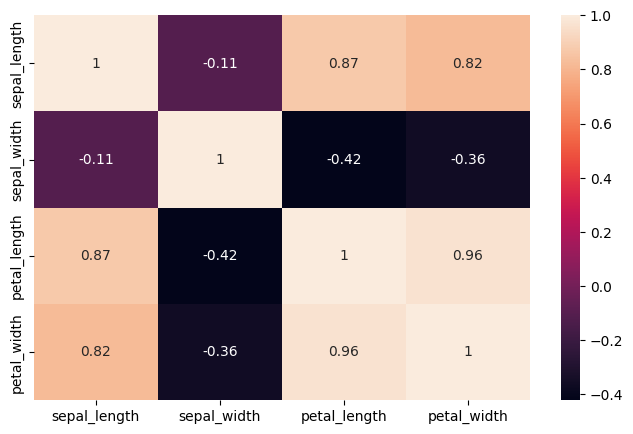

In [72]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr( numeric_only = True), annot=True)

In [73]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


FEATURE-ENGINEERING

In [74]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [75]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
y = df['species']

In [76]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

TRAIN-TEST SPLIT

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=104, test_size=0.20, shuffle=True)

In [78]:
print("Training set size of input fetaures: ",X_train.shape)
print("Training set size of output fetaure: ",y_train.shape)
print()
print("Testing set size of input fetaures: ",X_test.shape)
print("Testing set size of output fetaure: ",y_test.shape)

Training set size of input fetaures:  (117, 4)
Training set size of output fetaure:  (117,)

Testing set size of input fetaures:  (30, 4)
Testing set size of output fetaure:  (30,)


MODEL BUILDING : DECISION TREE TO CLASSIFY IRIS FLOWERS BASED ON SEPAL AND PETAL MEASUREMENTS

[Text(0.375, 0.875, 'petal_width <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [48.0, 50.0, 49.0]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5, 0.625, 'petal_width <= 1.75\ngini = 0.5\nsamples = 99\nvalue = [0, 50, 49]'),
 Text(0.25, 0.375, 'petal_length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.375, 'petal_length <= 4.85\ngini = 0.043\nsamples = 45\nvalue = [0, 1, 44]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 42\nvalue = [0, 0, 42]')]

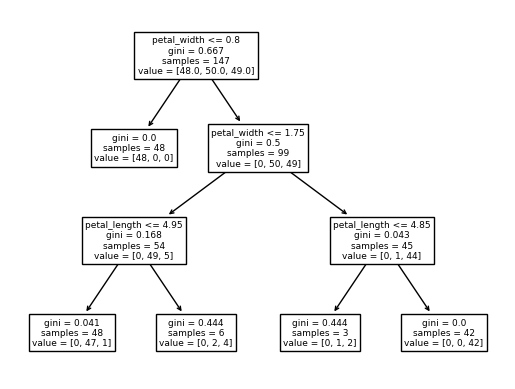

In [79]:
dtreeclf = DecisionTreeClassifier(criterion='gini',max_depth=3)
dtreeclf = dtreeclf.fit(X,y)
tree.plot_tree(dtreeclf, feature_names=features)

In [80]:
#Function to check for the accuracy of the training and testing set

def evaluate_model(dt_classifier): 
    print("Training Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train))*100)
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test))*100)
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [81]:
evaluate_model(dtreeclf)

Training Accuracy : 96.58119658119658
Train Confusion Matrix:
[[37  0  0]
 [ 0 34  3]
 [ 0  1 42]]
--------------------------------------------------
Test Accuracy : 100.0
Test Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [82]:
#Function to predict the label for new data

def predict_species(dtreeclf, features):
    
    if not isinstance(features[0], list):     #ensure features is a list of lists
        features = [features]

    columns = ['sepallen', 'sepalwid', 'petallen', 'petalwid']    #ensure features is a list of lists
    test_data = pd.DataFrame(features)   #convert the features into a DataFrame
    predictions = dtreeclf.predict(test_data)   #predict
    
    return predictions  

In [83]:
print(predict_species(dtreeclf,[[1,2,3,4]]))

['Iris-virginica']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
print(predict_species(dtreeclf, [[0.1, 2.2, 1.9, 0.2], [2.2, 1.6, 1.6, 1.8]]))

['Iris-setosa' 'Iris-virginica']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
